# A deep dive into Elon Musk's tweets about Dogecoin

### One visual perspective

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv('../data/dogecoin_tweets.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity,blob_polarity,blob_subjectivity,blob_sentiment,sentiment_flair,probability_flair,classified_similarly
0,2019-04-02,Dogecoin value may vary https://t.co/UWerAhPv63,"['dogecoin', 'value', 'may', 'vary']",[],dogecoin value may vary,[],"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.3400,0.0,0.444,0.556,positive,1.0,0.0,0.000,neutral,NEGATIVE,0.981104,0
1,2019-04-02,Dogecoin rulz https://t.co/flWWUgAgLU,"['dogecoin', 'rulz']",[],dogecoin rulz,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,neutral,NaN,0.0,0.000,neutral,NEGATIVE,0.992264,1
2,2019-04-02,@Tom_Heats Dogecoin might be my fav cryptocurr...,"['dogecoin', 'might', 'be', 'my', 'fav', 'cryp...",[],dogecoin might fav cryptocurrency pretty cool,[],"{'neg': 0.0, 'neu': 0.261, 'pos': 0.739, 'comp...",0.8176,0.0,0.739,0.261,positive,1.0,0.3,0.825,positive,POSITIVE,0.962192,1


#### Create a mask for wordcloud 

In [3]:
import numpy as np
from PIL import Image
mask = np.array(Image.open('dogecoin.jpg'))

### Create a wordcloud with TF-IDF

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
response = vectorizer.fit_transform(df["tweet_clean"])

df_tfidf_sklearn = pd.DataFrame(response.toarray(),columns=vectorizer.get_feature_names())
df_tfidf_sklearn

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ability,accepts,action,afternoon,always,amp,ancient,appease,awesome,based,...,tesla,toddler,trillionaire,tuition,tv,value,vary,weather,wrote,youre
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.569586,0.569586,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.494932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.208142,0.000000,0.000000,0.208142,0.208142,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.208142,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
tf_idf_counter = df_tfidf_sklearn.T.sum(axis=1)

In [6]:
wordcloud = WordCloud(width = 3000, height = 2000,background_color='white', colormap='Pastel1')
wordcloud.generate_from_frequencies(tf_idf_counter)

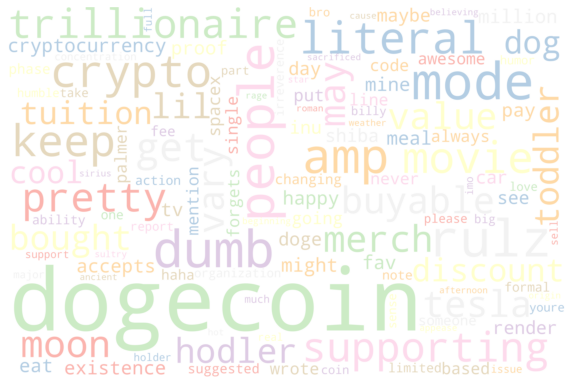

In [7]:
plt.figure(figsize=(10, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

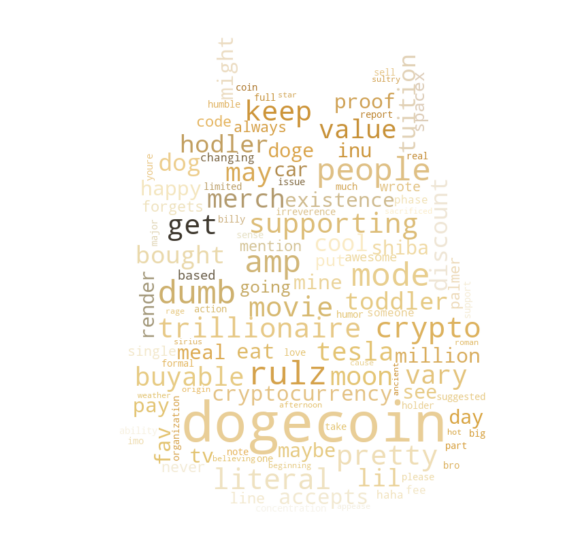

In [8]:
# Generate a word cloud image

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,
                      background_color='white', mode="RGBA", 
                      collocations=False, stopwords = STOPWORDS, mask=mask).generate_from_frequencies(tf_idf_counter)

# create coloring from image
image_colors = ImageColorGenerator(mask)

plt.figure(figsize=[15,10])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("dogecoin_wordcloud.png", format="png")

plt.show()